In [1]:
import sys

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [2]:
def plot_iris(dataset):
    fig, ax = plt.subplots(3, 3, figsize=(12, 10))
    for i in range(4):
        for j in range(i + 1, 4):
            scatter = ax[i][j - 1].scatter(dataset.data[:, i], dataset.data[:, j], c=dataset.target)
            ax[i][j - 1].set(xlabel=dataset.feature_names[i], ylabel=dataset.feature_names[j])
            ax[i][j - 1].legend(scatter.legend_elements()[0], dataset.target_names,
                                loc="lower right", title="classes")
    plt.show()

In [3]:
def min_dataset_param(data, index):
    min_param = sys.maxsize
    for i in range(len(data)):
        if data[i][index] < min_param:
                min_param = data[i][index]
    return min_param


def max_dataset_param(data, index):
    max_param = -float('inf')
    for i in range(len(data)):
        if data[i][index] > max_param:
                max_param = data[i][index]
    return max_param

In [4]:
def normalize_iris(dataset):
    normalized_dataset = dataset
    data = normalized_dataset.data
    for j in range(4):
        min_param = min_dataset_param(data, j)
        max_param = max_dataset_param(data, j)
        for i in range(len(data)):
            data[i][j] = (data[i][j] - min_param) / (max_param - min_param)
    return normalized_dataset


def normalize_item(item, dataset):
    for i in range(4):
        min_param = min_dataset_param(dataset.data, i)
        max_param = max_dataset_param(dataset.data, i)
        item[i] = min((item[i] - min_param) / (max_param - min_param), 1)
    return item

In [5]:
def dist(a, b):
    return np.sqrt((a.x - b.x) ** 2 + (a.y - b.y) ** 2)

In [6]:
def knn_class(item, dataset, k):
    item_data = item[0]
    distances = [(data, np.linalg.norm(np.array(item_data) - np.array(data[0]))) for data in dataset]
    sorted_distances = sorted(distances, key=lambda x: x[1])
    k_nearest_data = [pair[0] for pair in sorted_distances[:k]]
    class_frequencies = {}
    for data, class_label in k_nearest_data:
        if class_label in class_frequencies:
            class_frequencies[class_label] += 1
        else:
            class_frequencies[class_label] = 1
    most_common_class = max(class_frequencies, key=class_frequencies.get)
    return most_common_class

In [7]:
def optimal_k(train_dataset, test_dataset):
    n = len(train_dataset) + len(test_dataset)
    optimal = 1
    best_accuracy = 0
    for k in range(1, int(np.sqrt(n))):
        matches = 0
        for item in test_dataset:
            item_class = knn_class(item, train_dataset, k)
            if item_class == item[1]:
                matches += 1
        accuracy = matches / len(test_dataset)
        if accuracy > best_accuracy:
            optimal = k
            best_accuracy = accuracy
    return optimal, best_accuracy

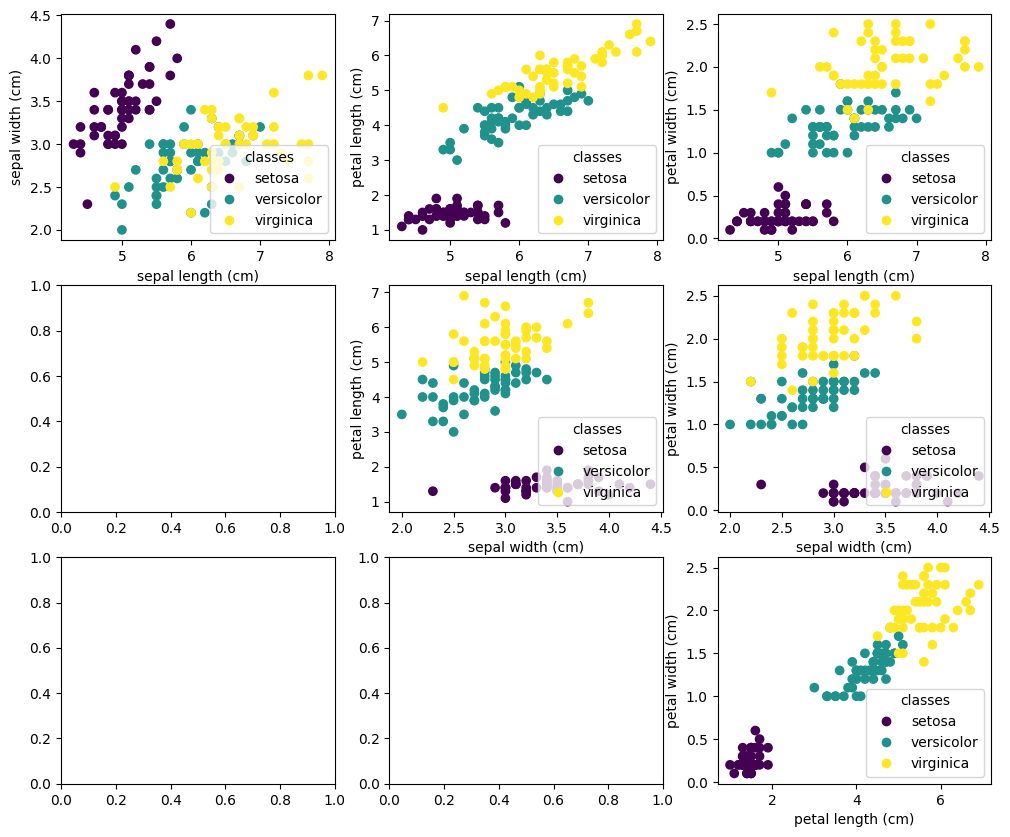

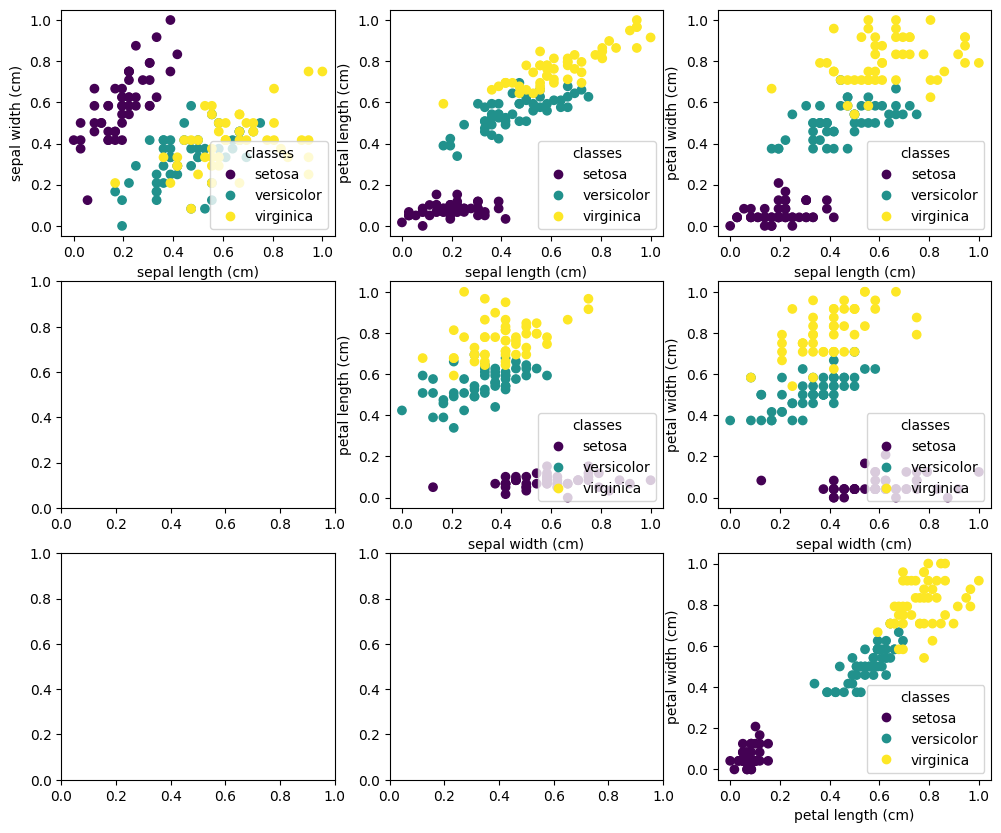

Optimal neighbours: 1, Accuracy: 1.0
New item is virginica


In [8]:
import random

if __name__ == '__main__':
    iris = load_iris()
    plot_iris(iris)
    iris = normalize_iris(iris)
    plot_iris(iris)
    items = []
    for i in range(len(iris.data)):
        items.append([iris.data[i], iris.target[i]])
    random.shuffle(items)
    train_dataset = []
    test_dataset = []
    for i in range(len(items)):
        if i in list(range(0, 15)):
            test_dataset.append(items[i])
        else:
            train_dataset.append(items[i])
    k, accuracy = optimal_k(train_dataset, test_dataset)
    print(f'Optimal neighbours: {k}, Accuracy: {accuracy}')
    # sep l, sep w, pet l, pet w
    item = [2, 3, 4, 2]
    item = normalize_item(item, iris)
    cl = knn_class(item, train_dataset, k)
    print(f'New item is {iris.target_names[cl]}')